In [1]:
# Load the data from the Apporto machine to the Colab environment

from google.colab import files
uploaded = files.upload()

Saving beer_reviews_cleaned.csv to beer_reviews_cleaned.csv


In [2]:
import requests
import seaborn as sns
#import researchpy as rp
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sns
from graphviz import Digraph
import pydotplus
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
from sklearn.feature_selection import RFE, chi2
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, make_scorer

df = pd.read_csv('beer_reviews_cleaned.csv')

In [3]:
print(df)

                  BREWERY_NAME           CITY  ... SIZE__OZ__ REVIEW_OVERALL
0       21st Amendment Brewery  San Francisco  ...         12            4.0
1       21st Amendment Brewery  San Francisco  ...         12            4.0
2       21st Amendment Brewery  San Francisco  ...         12            4.0
3       21st Amendment Brewery  San Francisco  ...         12            4.5
4       21st Amendment Brewery  San Francisco  ...         12            3.5
...                        ...            ...  ...        ...            ...
114694  Troegs Brewing Company        Hershey  ...         16            4.0
114695  Troegs Brewing Company        Hershey  ...         16            4.0
114696  Troegs Brewing Company        Hershey  ...         16            4.5
114697  Troegs Brewing Company        Hershey  ...         16            4.0
114698  Troegs Brewing Company        Hershey  ...         16            4.5

[114699 rows x 8 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89c6f37b00>,
      dtype=object)

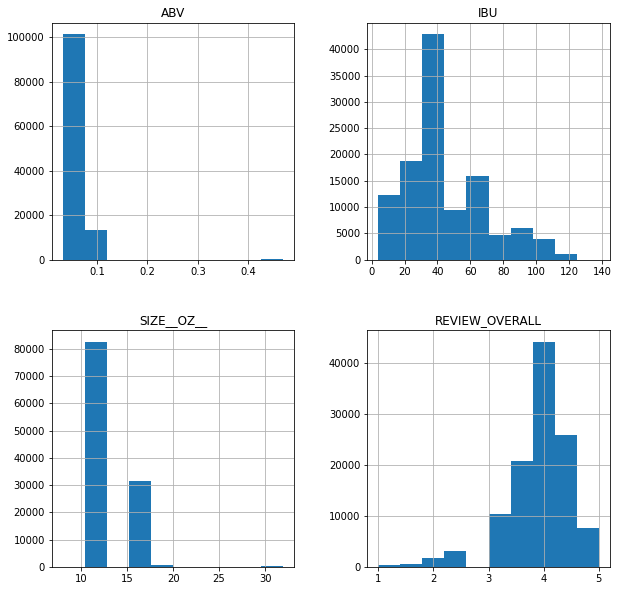

In [4]:
df.hist(figsize=(10,10))

In [5]:
print(df.columns)

Index(['BREWERY_NAME', 'CITY', 'STATE', 'STYLE', 'ABV', 'IBU', 'SIZE__OZ__',
       'REVIEW_OVERALL'],
      dtype='object')


In [6]:
#Looking for Null
print(df.isnull().sum())

BREWERY_NAME      0
CITY              0
STATE             0
STYLE             0
ABV               0
IBU               0
SIZE__OZ__        0
REVIEW_OVERALL    0
dtype: int64


In [7]:
#Reviews 
print(df.REVIEW_OVERALL.unique())

[4.  4.5 3.5 5.  2.  3.  2.5 1.  1.5]


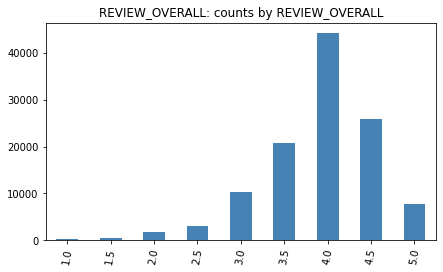

In [8]:
ax = df.REVIEW_OVERALL.value_counts().sort_index().plot.bar(figsize=(7, 4), color="steelblue", rot=80)
ax.title.set_text('REVIEW_OVERALL: counts by REVIEW_OVERALL')

In [9]:
list(df.columns)

['BREWERY_NAME',
 'CITY',
 'STATE',
 'STYLE',
 'ABV',
 'IBU',
 'SIZE__OZ__',
 'REVIEW_OVERALL']

In [10]:
df1 = df.copy()

In [11]:
print(df1)

                  BREWERY_NAME           CITY  ... SIZE__OZ__ REVIEW_OVERALL
0       21st Amendment Brewery  San Francisco  ...         12            4.0
1       21st Amendment Brewery  San Francisco  ...         12            4.0
2       21st Amendment Brewery  San Francisco  ...         12            4.0
3       21st Amendment Brewery  San Francisco  ...         12            4.5
4       21st Amendment Brewery  San Francisco  ...         12            3.5
...                        ...            ...  ...        ...            ...
114694  Troegs Brewing Company        Hershey  ...         16            4.0
114695  Troegs Brewing Company        Hershey  ...         16            4.0
114696  Troegs Brewing Company        Hershey  ...         16            4.5
114697  Troegs Brewing Company        Hershey  ...         16            4.0
114698  Troegs Brewing Company        Hershey  ...         16            4.5

[114699 rows x 8 columns]


In [12]:
# OVERALL_REVIEW greater than 4.0 means our beer is successful.
# Transforming reviews greater than 4.0 into integers.
df2 = df1.copy()
df2['REVIEW_OVERALL']= (df1['REVIEW_OVERALL'] >= 4.0).astype(int)
#print(df2.head(30))

In [13]:
print(df2.head(25))

              BREWERY_NAME           CITY  ... SIZE__OZ__ REVIEW_OVERALL
0   21st Amendment Brewery  San Francisco  ...         12              1
1   21st Amendment Brewery  San Francisco  ...         12              1
2   21st Amendment Brewery  San Francisco  ...         12              1
3   21st Amendment Brewery  San Francisco  ...         12              1
4   21st Amendment Brewery  San Francisco  ...         12              0
5   21st Amendment Brewery  San Francisco  ...         12              1
6   21st Amendment Brewery  San Francisco  ...         12              1
7   21st Amendment Brewery  San Francisco  ...         12              1
8   21st Amendment Brewery  San Francisco  ...         12              1
9   21st Amendment Brewery  San Francisco  ...         12              1
10  21st Amendment Brewery  San Francisco  ...         12              1
11  21st Amendment Brewery  San Francisco  ...         12              1
12  21st Amendment Brewery  San Francisco  ...     

In [ ]:
# df2.to_csv('/Users/hamidoumaiga/pythonProject/Model Classification Tree/df2.csv')

In [14]:
# Separating all the variables into two lists for future column indexing
# One for numerical, the other for categorical 
cvar_list = ['BREWERY_NAME', 'CITY', 'STATE', 'STYLE', 'REVIEW_OVERALL']
nvar_list = ['ABV', 'IBU','SIZE__OZ__']

In [16]:
# Part: Variable Transformation
# Standardizing the numerical variables
df3 = df2.copy()
df3[nvar_list] = (df1[nvar_list] - df1[nvar_list].mean())/df1[nvar_list].std()

In [17]:
# Setting the datatype for the variables in the cvar_list to be categorical
# Setting the datatype for the variables in the nvar_list to be numerical
df4 = df3.copy()
df4[cvar_list] = df3[cvar_list].astype('category')
df4[nvar_list] = df3[nvar_list].astype('float64')

In [18]:
# Converting the categorical variables into dummies
df5 = df4.copy()
df5 = pd.get_dummies(df4, prefix_sep='_', drop_first=True)

print(df5.columns.values.shape)

(635,)


In [19]:
df6 = df5.copy()

# Getting the remaining variable list after the variable transformation
print(df6.columns.values)

# Display the milestone dataframe. Compare it with the original dataframe.
print(df6)
print(df)

['ABV' 'IBU' 'SIZE__OZ__' 'BREWERY_NAME_4 Hands Brewing Company'
 'BREWERY_NAME_7 Seas Brewing Company'
 'BREWERY_NAME_AC Golden Brewing Company'
 'BREWERY_NAME_Abita Brewing Company' 'BREWERY_NAME_Alameda Brewing'
 'BREWERY_NAME_Alaskan Brewing Company' 'BREWERY_NAME_Ale Asylum'
 "BREWERY_NAME_Alltech's Lexington Brewing Company"
 'BREWERY_NAME_Amnesia Brewing Company'
 'BREWERY_NAME_Anchor Brewing Company'
 'BREWERY_NAME_Anderson Valley Brewing Company'
 'BREWERY_NAME_Angry Minnow Brewing Company'
 'BREWERY_NAME_Arcadia Brewing Company'
 'BREWERY_NAME_Arctic Craft Brewery' 'BREWERY_NAME_Armadillo Ale Works'
 'BREWERY_NAME_Asher Brewing Company'
 'BREWERY_NAME_Asheville Brewing Company'
 'BREWERY_NAME_Aspen Brewing Company'
 'BREWERY_NAME_Astoria Brewing Company' 'BREWERY_NAME_Atwater Brewery'
 'BREWERY_NAME_Austin Beerworks' 'BREWERY_NAME_Avery Brewing Company'
 'BREWERY_NAME_Aviator Brewing Company'
 'BREWERY_NAME_Back Forty Beer Company'
 'BREWERY_NAME_Ballast Point Brewing Company

In [20]:
# Part: Data Partiton
from sklearn.model_selection import train_test_split

# Placeholder variables: df4partition, testpart_size
# test_size specifies the percentage for the test partition
df4partition = df6
testpart_size = 0.2 #Using 20% of the data for testing

# random_state specifies the seed for random number generator. 
# random_state = 1 unless otherwised noted
df_nontestData, df_testData = train_test_split(df4partition, test_size=testpart_size, random_state=1)

print(df_nontestData)

            ABV       IBU  ...  STYLE_Witbier  REVIEW_OVERALL_1
84331 -0.379604 -0.372700  ...              0                 1
70407 -1.269955 -0.160949  ...              0                 1
62890 -0.761183 -0.160949  ...              0                 1
7601  -0.824780 -0.160949  ...              0                 1
54262  0.637939 -0.033899  ...              0                 1
...         ...       ...  ...            ...               ...
50057 -0.888376 -0.160949  ...              0                 0
98047  1.273904 -0.880903  ...              0                 1
5192  -1.079165 -0.160949  ...              0                 1
77708  1.655483  1.660110  ...              0                 1
98539  1.146711  3.142367  ...              0                 1

[91759 rows x 635 columns]


In [21]:
# Logistic Regression with pre-specified Penalty level Alpha = 0.1

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# Separate the predictor values and the DV values into X and y respectively
# Placeholder variable: DV
DV = 'REVIEW_OVERALL_1'
y = df_nontestData[DV]
X = df_nontestData.drop(columns=[DV])

# Run Logistic regression with pre-specified penalty level (alpha)
# Placeholder variable: alpha
alpha = 0.1

# The Logistic regression results are put into a model object clf
clf = LogisticRegression(C=1/alpha, penalty='l1', solver='saga', max_iter=200, random_state=1).fit(X,y)

# A user-defined function summary_coef
# to display the estimated coefficients of a model candidate obtained by the Logistic Regression analysis
def summary_coef(model_object):
  n_predictors = X.shape[1]
  model_coef = pd.DataFrame(model_object.coef_.reshape(1, n_predictors), columns=X.columns.values)
  model_coef['Intercept'] = model_object.intercept_
  return model_coef.transpose()

print(summary_coef(clf))

                                             0
ABV                                   0.015328
IBU                                   0.161045
SIZE__OZ__                            0.205158
BREWERY_NAME_4 Hands Brewing Company  0.705627
BREWERY_NAME_7 Seas Brewing Company  -0.214141
...                                        ...
STYLE_Vienna Lager                    0.093106
STYLE_Wheat Ale                      -0.198612
STYLE_Winter Warmer                  -0.424104
STYLE_Witbier                        -0.153757
Intercept                             0.515387

[635 rows x 1 columns]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [22]:
# Logistic Regression with pre-specified Penalty level Alpha = 20

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# Separate the predictor values and the DV values into X and y respectively
# Placeholder variable: DV
DV = 'REVIEW_OVERALL_1'
y = df_nontestData[DV]
X = df_nontestData.drop(columns=[DV])

# Run Logistic regression with pre-specified penalty level (alpha)
# Placeholder variable: alpha
alpha = 10

# The Logistic regression results are put into a model object clf
clf = LogisticRegression(C=1/alpha, penalty='l1', solver='saga', max_iter=200, random_state=1).fit(X,y)

# A user-defined function summary_coef
# to display the estimated coefficients of a model candidate obtained by the Logistic Regression analysis
def summary_coef(model_object):
  n_predictors = X.shape[1]
  model_coef = pd.DataFrame(model_object.coef_.reshape(1, n_predictors), columns=X.columns.values)
  model_coef['Intercept'] = model_object.intercept_
  return model_coef.transpose()

print(summary_coef(clf))

                                             0
ABV                                   0.025082
IBU                                   0.197059
SIZE__OZ__                            0.146436
BREWERY_NAME_4 Hands Brewing Company  0.000000
BREWERY_NAME_7 Seas Brewing Company   0.000000
...                                        ...
STYLE_Vienna Lager                    0.333145
STYLE_Wheat Ale                       0.000000
STYLE_Winter Warmer                  -0.167572
STYLE_Witbier                         0.000000
Intercept                             0.529672

[635 rows x 1 columns]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [23]:
print(summary_coef(clf).head(20))
print(summary_coef(clf).describe())

                                                         0
ABV                                               0.025082
IBU                                               0.197059
SIZE__OZ__                                        0.146436
BREWERY_NAME_4 Hands Brewing Company              0.000000
BREWERY_NAME_7 Seas Brewing Company               0.000000
BREWERY_NAME_AC Golden Brewing Company            0.000000
BREWERY_NAME_Abita Brewing Company               -0.334131
BREWERY_NAME_Alameda Brewing                      0.000000
BREWERY_NAME_Alaskan Brewing Company              0.105829
BREWERY_NAME_Ale Asylum                           0.260088
BREWERY_NAME_Alltech's Lexington Brewing Company  0.000000
BREWERY_NAME_Amnesia Brewing Company              0.000000
BREWERY_NAME_Anchor Brewing Company               0.688507
BREWERY_NAME_Anderson Valley Brewing Company      0.311391
BREWERY_NAME_Angry Minnow Brewing Company         0.000000
BREWERY_NAME_Arcadia Brewing Company              0.0000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89c55285f8>]],
      dtype=object)

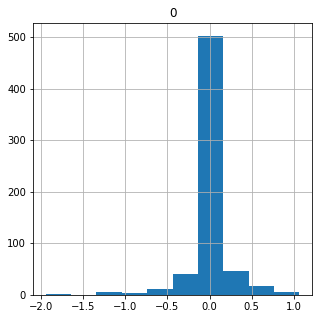

In [24]:
coefficient = summary_coef(clf).copy()
coefficient.hist(figsize=(5, 5))

In [25]:
print(df6.groupby('REVIEW_OVERALL_1').sum())

                          ABV          IBU  ...  STYLE_Winter Warmer  STYLE_Witbier
REVIEW_OVERALL_1                            ...                                    
0                -6797.322718 -9897.935956  ...                415.0          438.0
1                 6797.322718  9897.935956  ...                508.0          670.0

[2 rows x 634 columns]


In [26]:
# Classification tree 
from sklearn.model_selection import train_test_split

# Placeholder variables: df4partition, testpart_size
# test_size specifies the percentage for the test partition
df4partition = df6
testpart_size = 0.2

# random_state specifies the seed for random number generator. 
# random_state = 1 unless otherwised noted
df_nontestData, df_testData = train_test_split(df4partition, test_size=testpart_size, random_state=1)

print(df_nontestData)

            ABV       IBU  ...  STYLE_Witbier  REVIEW_OVERALL_1
84331 -0.379604 -0.372700  ...              0                 1
70407 -1.269955 -0.160949  ...              0                 1
62890 -0.761183 -0.160949  ...              0                 1
7601  -0.824780 -0.160949  ...              0                 1
54262  0.637939 -0.033899  ...              0                 1
...         ...       ...  ...            ...               ...
50057 -0.888376 -0.160949  ...              0                 0
98047  1.273904 -0.880903  ...              0                 1
5192  -1.079165 -0.160949  ...              0                 1
77708  1.655483  1.660110  ...              0                 1
98539  1.146711  3.142367  ...              0                 1

[91759 rows x 635 columns]


In [27]:
# Required package: scikit-learn. Package name in Python: sklearn
# Required subpackage: tree 
# Required function name: DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier


# Separate the predictor values and the DV values into X and y respectively
# Placeholder variable: DV
DV = 'REVIEW_OVERALL_1'
y = df_nontestData[DV]
X = df_nontestData.drop(columns=[DV])

from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image

# A user-defined function summary_tree to display a classification tree
def summary_tree(model_object):
  dot_data = StringIO()
  export_graphviz(model_object, out_file=dot_data, filled=True,
                  rounded=True, special_characters=True, feature_names=X.columns.values,
                  class_names=['0', '1'])
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  output_imagefile = 'tree.png'
  graph.write_png(output_imagefile)
  return output_imagefile


In [29]:
kfolds = 5

# Here we specify within which range of depths we will search for the best pruned tree
maximum_depth = 10
minimum_depth = 1

param_grid = {'max_depth': list(range(minimum_depth, maximum_depth+1))}


from sklearn.model_selection import GridSearchCV

gridsearch = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state=1), param_grid, scoring='roc_auc', cv=kfolds, n_jobs=-1)
gridsearch.fit(X,y)
clf_BPT = gridsearch.best_estimator_

# Display the resulting best pruned tree
Image(summary_tree(clf_BPT))

Output hidden; open in https://colab.research.google.com to view.

In [30]:
# Display the level of depth of the best pruned tree
print(clf_BPT.get_depth())

# y_test_actual is the actual values of the DV in the test partition
y_test_actual = df_testData[DV]

# X_test is the predictor values in the test partition
X_test = df_testData.drop(columns=[DV])


# Get the AUC of the best pruned tree model
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test_actual, clf_BPT.predict_proba(X_test)[:,1]))

10
0.7120761534499717


In [32]:
# The user-defined function for getting the tree path
# Author: Federico Ibba on stackoverflow.com 
# Created date: Jan 19, 2018
# URL: https://stackoverflow.com/questions/32506951/how-to-explore-a-decision-tree-built-using-scikit-learn/35911666
# Modified by Lin Hao during Oct. 2020

def get_treepaths(dtc, df):
    rules_list = []
    values_path = []
    values = dtc.tree_.value

    def RevTraverseTree(tree, node, rules, pathValues):
        try:
            prevnode = tree[2].index(node)           
            leftright = '<='
            pathValues.append(values[prevnode])
        except ValueError:
            # failed, so find it as a right node - if this also causes an exception, something's really f'd up
            prevnode = tree[3].index(node)
            leftright = '>'
            pathValues.append(values[prevnode])

        # now let's get the rule that caused prevnode to -> node
        p1 = df.columns[tree[0][prevnode]]    
        p2 = tree[1][prevnode]    
        rules.append(str(p1) + ' ' + leftright + ' ' + str(p2))

        # if we've not yet reached the top, go up the tree one more step
        if prevnode != 0:
            RevTraverseTree(tree, prevnode, rules, pathValues)

    # get the nodes which are leaves
    leaves = dtc.tree_.children_left == -1
    leaves = np.arange(0,dtc.tree_.node_count)[leaves]

    # build a simpler tree as a nested list: [split feature, split threshold, left node, right node]
    thistree = [dtc.tree_.feature.tolist()]
    thistree.append(dtc.tree_.threshold.tolist())
    thistree.append(dtc.tree_.children_left.tolist())
    thistree.append(dtc.tree_.children_right.tolist())

    # get the decision rules for each leaf node & apply them
    for (ind,nod) in enumerate(leaves):

        # get the decision rules
        rules = []
        pathValues = []
        RevTraverseTree(thistree, nod, rules, pathValues)

        pathValues.insert(0, values[nod])      
        pathValues = list(reversed(pathValues))

        rules = list(reversed(rules))

        rules_list.append(rules)
        values_path.append(pathValues)

    for i in range(len(rules_list)):
      
      print('\nLeaf node ID =', i+1)
      print('Path =', rules_list[i])
      distro = sum(values_path[i][-1])
      print('sample =', int(sum(distro)))
      print('value =', list([int(distro[0]), int(distro[1])]))
      predicted_class = 1 if distro[1] > distro[0] else 0
      print('class = ', predicted_class)
      
    return None

get_treepaths(dtc=clf_BPT, df=df_nontestData)


Leaf node ID = 1
Path = ['ABV <= -0.4114025682210922', 'IBU <= -0.944427877664566', 'IBU <= -1.3255797028541565', 'STYLE_American Pale Wheat Ale <= 0.5', 'BREWERY_NAME_Atwater Brewery <= 0.5', 'STYLE_Hefeweizen <= 0.5', 'STYLE_Witbier <= 0.5', 'STATE_MO <= 0.5', 'STATE_MA <= 0.5', 'STYLE_American Adjunct Lager <= 0.5']
sample = 1156
value = [809, 347]
class =  0

Leaf node ID = 2
Path = ['ABV <= -0.4114025682210922', 'IBU <= -0.944427877664566', 'IBU <= -1.3255797028541565', 'STYLE_American Pale Wheat Ale <= 0.5', 'BREWERY_NAME_Atwater Brewery <= 0.5', 'STYLE_Hefeweizen <= 0.5', 'STYLE_Witbier <= 0.5', 'STATE_MO <= 0.5', 'STATE_MA <= 0.5', 'STYLE_American Adjunct Lager > 0.5']
sample = 112
value = [68, 44]
class =  0

Leaf node ID = 3
Path = ['ABV <= -0.4114025682210922', 'IBU <= -0.944427877664566', 'IBU <= -1.3255797028541565', 'STYLE_American Pale Wheat Ale <= 0.5', 'BREWERY_NAME_Atwater Brewery <= 0.5', 'STYLE_Hefeweizen <= 0.5', 'STYLE_Witbier <= 0.5', 'STATE_MO <= 0.5', 'STATE_M